# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [3]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import tensorflow.keras as keras
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [4]:
# YOUR CODE HERE
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
df = pd.read_csv(bookReviewDataSet_filename, header = 0)
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
# YOUR CODE HERE

#addressing missingness
print(df.isnull().sum())

#addressing class imbalance
positive_reviews = df['Positive Review'].value_counts('True')
negative_reviews = df['Positive Review'].value_counts('False')

print('negative reviews: ', negative_reviews,'positive reviews: ', positive_reviews)

print(df.describe())

print(df.dtypes)

Review             0
Positive Review    0
dtype: int64
negative reviews:  False    0.503294
True     0.496706
Name: Positive Review, dtype: float64 positive reviews:  False    0.503294
True     0.496706
Name: Positive Review, dtype: float64
                                                   Review Positive Review
count                                                1973            1973
unique                                               1865               2
top     I have read several of Hiaasen's books and lov...           False
freq                                                    3             993
Review             object
Positive Review      bool
dtype: object


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [22]:
#creating x and y
y = df['Positive Review']
X = df['Review']

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

#performing vectorization
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(X_train)

X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

19029


In [7]:
#Decision Tree
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='entropy'):
    
     # 1. Create the  Scikit-learn DecisionTreeClassifier model object below and assign to variable 'model'
    dt_model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf)

    # 2. Fit the model to the training data below
    dt_model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
    class_label_predictions_dt = dt_model.predict(X_test)

    # 4. Compute the accuracy here and save the result to the variable 'acc_score'
    acc_score = accuracy_score(y_test, class_label_predictions_dt)
        
    
    return acc_score


In [8]:
depth1 = 2 
depth2 = 50
leaf = 1

max_depth_range = [17,18,19,20,21,22,23,46,47,48,49,depth2]
acc = []

for md in max_depth_range:
    score = train_test_DT(X_train_tfidf.toarray(), X_test_tfidf.toarray(), y_train, y_test, 1, md)
    print('Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))

print(acc)


Depth=17, accuracy score: 0.6556962025316456
Depth=18, accuracy score: 0.6430379746835443
Depth=19, accuracy score: 0.6430379746835443
Depth=20, accuracy score: 0.6329113924050633
Depth=21, accuracy score: 0.6481012658227848
Depth=22, accuracy score: 0.6708860759493671
Depth=23, accuracy score: 0.6481012658227848
Depth=46, accuracy score: 0.6303797468354431
Depth=47, accuracy score: 0.6481012658227848
Depth=48, accuracy score: 0.6430379746835443
Depth=49, accuracy score: 0.6582278481012658
Depth=50, accuracy score: 0.6354430379746835
[0.6556962025316456, 0.6430379746835443, 0.6430379746835443, 0.6329113924050633, 0.6481012658227848, 0.6708860759493671, 0.6481012658227848, 0.6303797468354431, 0.6481012658227848, 0.6430379746835443, 0.6582278481012658, 0.6354430379746835]


In [9]:
# Create a range of hyperparameter values for 'max_depth'. 
#Note these are the same values as those we used above
hyperparams_depth = [2*n for n in range(2,15)]

# Create a range of hyperparameter values for 'min_samples_leaf'. 
hyperparams_leaf = [25*2**n for n in range(0,3)]

# Create parameter grid.
param_grid={'max_depth':hyperparams_depth, 'min_samples_leaf':hyperparams_leaf}
param_grid


{'max_depth': [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28],
 'min_samples_leaf': [25, 50, 100]}

In [10]:
print('Running Grid Search...')

DT_model = DecisionTreeClassifier()

# Run a Grid Search with 5-fold cross-validation using the model.
grid = GridSearchCV(DT_model, param_grid, cv=5)

# Fit the model on the training data and assign the fitted model to the 
#    variable grid_search
grid_search = grid.fit(X_train_tfidf.toarray(), y_train)

print('Done')

# Print best-performing hyperparameter configuration
print('Optimal hyperparameters: {0}'.format(grid_search.best_params_))

# print best accuracy score resulting from this configuration
print('Accuracy score: {0}'.format(grid_search.best_score_))

Running Grid Search...
Done
Optimal hyperparameters: {'max_depth': 8, 'min_samples_leaf': 25}
Accuracy score: 0.6723588507132812


**Best Hyperparameters:**
- max_depth = 8
- min_samples_leaf = 25

AUC: 0.706850579427751

In [11]:
dt_model = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 25)
dt_model.fit(X_train_tfidf.toarray(), y_train)
predictions_proba = dt_model.predict_proba(X_test_tfidf.toarray())[:, 1]  
auc = roc_auc_score(y_test, predictions_proba)
print("AUC:", auc)

AUC: 0.7056199364167777


In [12]:
# Random Forest
print('Begin Random Forest Implementation...')
# 1. Create the RandomForestClassifier model object below and assign to variable 'rf_20_model'
rf_20_model = RandomForestClassifier(criterion='entropy', n_estimators=20)

# 2. Fit the model to the training data below
rf_20_model.fit(X_train_tfidf.toarray(), y_train)

# 3. Make predictions on the test data using the predict_proba() method and assign the result to a 
# list named 'rf_20_predictions' below
rf_20_predictions = rf_20_model.predict_proba(X_test_tfidf.toarray())[:,1].tolist()

# 4. Create the RandomForestClassifier model object below and assign to variable 'rf_100_model'
rf_100_model = RandomForestClassifier(criterion='entropy', n_estimators=100)

# 5. Fit the model to the training data below
rf_100_model.fit(X_train_tfidf.toarray(), y_train)

# 6. Make predictions on the test data using the predict_proba() method and assign the result to a 
# list named 'rf_100_predictions' below
rf_100_predictions = rf_100_model.predict_proba(X_test_tfidf.toarray())[:,1].tolist()

print('End')

Begin Random Forest Implementation...
End


In [13]:
print('Computing ROC Curve...')

#1. Use roc_curve to record fpr and tpr for rf_20_model
fpr_20, tpr_20, thresholds_20 = roc_curve(y_test, rf_20_predictions)

#2. Use roc_curve to record fpr and tpr for rf_100_model
fpr_100, tpr_100, thresholds_100 = roc_curve(y_test, rf_100_predictions)

print('End')

Computing ROC Curve...
End


In [14]:
auc_20 = roc_auc_score(y_test, rf_20_predictions)

print("AUC of the RF model with 20 estimators is {:.3f}".format(auc_20))

# 2. AUC for rf_100_model
auc_100 = roc_auc_score(y_test, rf_100_predictions)

print("AUC of the RF model with 100 estimators is {:.3f}".format(auc_100))

AUC of the RF model with 20 estimators is 0.815
AUC of the RF model with 100 estimators is 0.878


Plotting ROC Curve...


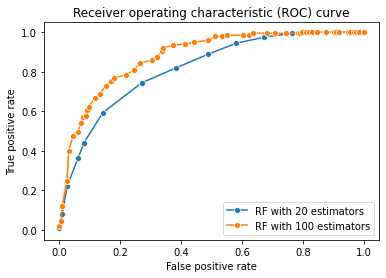

In [15]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_20, y=tpr_20, marker = 'o')
sns.lineplot(x=fpr_100, y=tpr_100, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with 20 estimators', 'RF with 100 estimators'])
plt.show()

**Best parameters:**
- rf model with 150 estimators, min_samples_leaf:2, max_depth:30

auc = 0.900


In [17]:
# Random Forest Model
rf_model = RandomForestClassifier(criterion='entropy')

# using grid search to find best parameters
rf_param_grid = {
    'n_estimators': [50, 100, 150, 200],              
    'max_depth': [None, 10, 20, 30],                 
    'min_samples_leaf': [1, 2, 4, 6, 8],  
}

rf_randomized_search = RandomizedSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy')
rf_randomized_search.fit(X_train_tfidf.toarray(), y_train)

best_params = rf_randomized_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'n_estimators': 150, 'min_samples_leaf': 2, 'max_depth': 30}


In [20]:
#Best random forest model

rf_best_model = RandomForestClassifier(criterion='entropy', n_estimators=150, min_samples_leaf=2,max_depth=30)
rf_best_model.fit(X_train_tfidf.toarray(), y_train)
rf_best_predictions = rf_best_model.predict_proba(X_test_tfidf.toarray())[:,1].tolist()

print('Computing ROC Curve...')

#Use roc_curve to record fpr and tpr for rf_best_model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, rf_best_predictions)

print('End')

auc_best = roc_auc_score(y_test, rf_best_predictions)

print("AUC of the RF model with 150 estimators is {:.3f}".format(auc_best))

Computing ROC Curve...
End
AUC of the RF model with 150 estimators is 0.900


In [19]:
# GBDT BEST
print('Begin Best GBDT Implementation...')

# 1. Create the GradientBoostingClassifier model object 
gbdt_best_model = GradientBoostingClassifier(n_estimators = 200, max_depth = 2)

# 2. Fit the model to the training data below
gbdt_best_model.fit(X_train_tfidf.toarray(), y_train)

# 3. Make predictions on the test data using the predict_proba() method
gbdt_best_predictions = gbdt_best_model.predict_proba(X_test_tfidf.toarray())[:,1].tolist()

print('End')

Begin Best GBDT Implementation...
End


In [20]:
print('Computing ROC Curve...')

#2. Use roc_curve to record fpr and tpr for gbdt_best_model
fpr_gbdt_best, tpr_gbdt_best, thresholds_gbdt_best = roc_curve(y_test, gbdt_best_predictions)

print('End')

#1. AUC for gbdt_best_model
auc_gbdt_best = auc(fpr_gbdt_best, tpr_gbdt_best)

print("AUC of the GBDT model with a max depth of 2 is {:.3f}".format(auc_gbdt_best))


Computing ROC Curve...
End
AUC of the GBDT model with a max depth of 2 is 0.877


n_estimators = 50
- AUC of the GBDT model with a max depth of 2 is 0.838
- AUC of the GBDT model with a max depth of 10 is 0.855

n_estimators = 100
- AUC of the GBDT model with a max depth of 10 is 0.873
- AUC of the GBDT model with a max depth of 2 is 0.866

n_estimators = 200
- AUC of the GBDT model with a max depth of 2 is 0.879
- AUC of the GBDT model with a max depth of 10 is 0.877

Plotting ROC Curve...


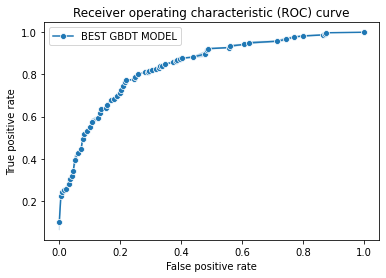

In [10]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr_gbdt_best, y=tpr_gbdt_best, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['BEST GBDT MODEL'])
plt.show()

With best parameters, make the optimal model

In [23]:
# 1. Create model object
nn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 

# Create input layer:
input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))

# Add input_layer to the model object:
nn_model.add(input_layer)


# 3. Create the first hidden layer and add it to the model object:

# Create input layer:
hidden_layer_1 = keras.layers.Dense(units=64, activation = 'relu')

# Add hidden_layer_1 to the model object:
nn_model.add(hidden_layer_1)
nn_model.add(keras.layers.Dropout(.25))

# 4. Create the second layer and add it to the model object:

# Create input layer:
hidden_layer_2 = keras.layers.Dense(units=32, activation = 'relu')

# Add hidden_layer_2 to the model object:
nn_model.add(hidden_layer_2)
nn_model.add(keras.layers.Dropout(.25))

# 5. Create the third layer and add it to the model object:

# Create input layer:
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')

# Add hidden_layer_3 to the model object:
nn_model.add(hidden_layer_3)
nn_model.add(keras.layers.Dropout(.25))

# 6. Create the output layer and add it to the model object:

# Create input layer:
output_layer = keras.layers.Dense(units = 1, activation='sigmoid')

# Add output_layer to the model object:
nn_model.add(output_layer)


# Print summary of neural network model structure
nn_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1217920   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [24]:
sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.1)

loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

In [25]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [26]:
t0 = time.time() # start time

#epochs

num_epochs = 50  # You can adjust this value based on your experimentation

# Train the model using batches of training data
history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs = num_epochs, verbose = 0, callbacks = [ProgBarLoggerNEpochs(num_epochs, every_n = 50)], validation_split = 0.2)


t1 = time.time() # stop time
#
print('Elapsed time: %.2fs' % (t1-t0))

loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)
loss_train, accuracy_train = nn_model.evaluate(X_train_tfidf.toarray(), y_train)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))
print('Loss: ', str(loss_train) , 'Accuracy: ', str(accuracy_train))

Epoch [50/ 50], Loss: 0.2704, Accuracy: 0.8954, Val_loss: 0.4126, Val_accuracy: 0.8006
Elapsed time: 17.13s
50/50 [==============================] - 0s 3ms/step - loss: 0.1200 - accuracy: 0.9601
Loss:  0.4068230986595154 Accuracy:  0.8177215456962585
Loss:  0.11997424066066742 Accuracy:  0.9600760340690613


In [29]:
nn_predictions = nn_model.predict(X_test_tfidf.toarray())
auc_score = roc_auc_score(y_test, nn_predictions)
auc_score

0.9066505999384679

Try to find best parameters for neural network model

compare each one's auc


Ranking based on auc score:
1. Neural Network model
2. Random Forest model
3. Gradient Boosting Decision Tree model
4. Decision Tree model

**couldn't perform grid search cross validation on gradient boosting as it took too long and did it manually**
